In [67]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.integrate import solve_ivp

In [68]:
tol = 1e-4
K = 1
L = 4
epsilon_start = 0.1
xshoot = [-L,L]
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)
eigenvalues = []
eigenfunctions = []
col = ['r', 'b', 'g', 'c', 'm', 'k']

In [69]:
def shoot2(psi, x, epsilon):
    return [psi[1], (K * x**2 - epsilon) * psi[0]]

[[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588478e-02
  4.50516634e-02]
 [3.76940965e-04 2.08377489e-03 7.88695717e-03 2.35399844e-02
  5.86293757e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583009e-02
  7.58484043e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281013e-02
  9.71899167e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048300e-02
  1.23080911e-01]
 [1.64382706e-03 8.13893182e-03 2.73391697e-02 7.15653865e-02
  1.53831247e-01]
 [2.32055909e-03 1.11600069e-02 3.63163649e-02 9.17795064e-02
  1.89559870e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171083e-01
  2.30113256e-01]
 [4.48904553e-03 2.03165046e-02 6.18486349e-02 1.45069155e-01
  2.74981570e-01]
 [6.15097107e-03 2.69674234e-02 7.92584569e-02 1.78649429e-01
  3.23220561e-01]
 [8.34442598e-03 3.54034079e-02 1.00317630e-01 2.16868662e-01
  3.73389602e-01]
 [1.12075190e-02 4.59653552e-02 1.25381539e-01 2.59395937e-01
  4.23518000e-01]
 [1.49032591e-02 5.90146385e-02 1.547089

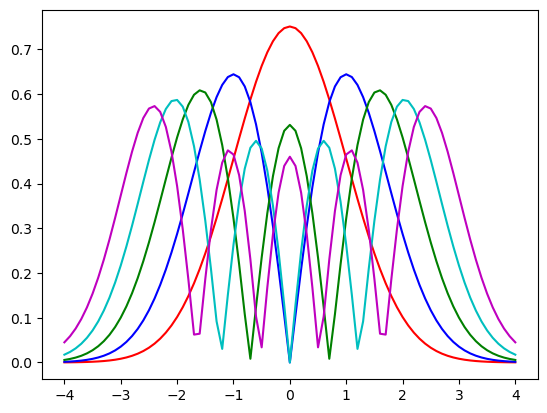

In [70]:
for modes in range(1, 6): 
    epsilon = epsilon_start 
    depsilon = 0.1
    for _ in range(1000):
        x0 = [1, np.sqrt(L**2 - epsilon)]
        y = odeint(shoot2, x0, xspan, args=(epsilon,)) 
        if abs(np.sqrt(L**2 - epsilon) * y[-1,0] + y[-1,1]) < tol:  
            eigenvalues.append(epsilon)
            norm = np.trapz(y[:, 0] * y[:, 0], xspan)
            eigenfunctions.append(np.abs(y[:, 0] / np.sqrt(norm)))
            break  

        if (-1) ** (modes + 1) * (np.sqrt(L**2 - epsilon)*y[-1, 0] + y[-1,1]) > 0:
            epsilon += depsilon
        else:
            
            epsilon -= depsilon / 2
            depsilon /= 2
            
    epsilon_start = epsilon + 0.1  
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) 
    plt.plot(xspan, abs(y[:, 0] / np.sqrt(norm)), col[modes-1]) 

A2 = eigenvalues
A1_array = np.array(eigenfunctions)
A1 = A1_array.reshape(5,-1).T

print(A1)
print(A2)
plt.show()

[[5.25330699e-04 2.98456761e-03 1.16813892e-02 3.63686000e-02
  9.51972132e-02]
 [5.65512106e-04 3.17867602e-03 1.23103621e-02 3.79293177e-02
  9.82728588e-02]
 [6.86056325e-04 3.76100125e-03 1.41972809e-02 4.26114709e-02
  1.07499796e-01]
 [8.98810813e-04 4.77370390e-03 1.74256431e-02 5.04722741e-02
  1.22627826e-01]
 [1.22563002e-03 6.29686640e-03 2.21697911e-02 6.17195708e-02
  1.43567680e-01]
 [1.69904226e-03 8.44739584e-03 2.86805596e-02 7.66574580e-02
  1.70263737e-01]
 [2.36360740e-03 1.13795764e-02 3.72731333e-02 9.56348953e-02
  2.02577475e-01]
 [3.27778429e-03 1.52862084e-02 4.83140276e-02 1.18992039e-01
  2.40177270e-01]
 [4.51615458e-03 2.03994055e-02 6.22047699e-02 1.47001309e-01
  2.82435062e-01]
 [6.17184584e-03 2.69901644e-02 7.93603878e-02 1.79802251e-01
  3.28334572e-01]
 [8.35897170e-03 3.53658263e-02 1.00181339e-01 2.17331292e-01
  3.76399121e-01]
 [1.12148677e-02 4.58645556e-02 1.25018153e-01 2.59249582e-01
  4.24649610e-01]
 [1.49018556e-02 5.88460072e-02 1.541288

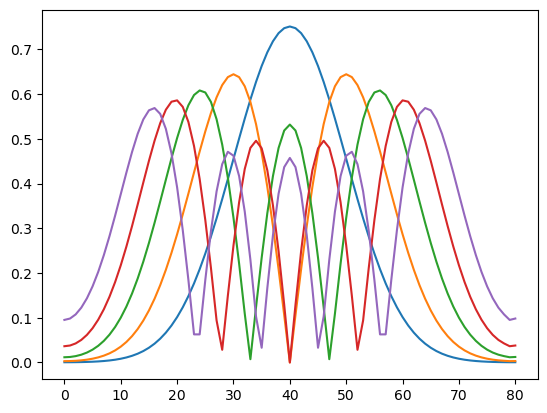

In [71]:
N = len(xspan) - 2
dx = 0.1
eigenvalues = []
eigenfunctions = []

M1 = np.zeros((N, N))
for i in range(N):
    M1[i, i] = (-2 - K * (xspan[i+1]) ** 2 * dx **2)
    for j in range(N - 1):
        M1[j, j+1] = 1
        M1[j+1, j] = 1
M1 = M1 / (dx ** 2)

M2 = np.zeros((N, N))
M2[0, 0] = 4/3
M2[0, 1] = -1/3
M2[N-1, N-2] = -1/3
M2[N-1, N-1] = 4/3
M2 = M2 / (dx ** 2)

M3 = M1 + M2 

D,V = eig(-M3)

sorted_indices = np.argsort(np.abs(D))[::-1] 
Dsort = D[sorted_indices]
Vsort =V[:, sorted_indices]


for modes in range(1,6):
    eigenvalues.append(Dsort[-modes].real)
    phi_n = Vsort[:,-modes]
    phi_n = np.insert(phi_n, 0, 4/3*phi_n[0] - 1/3*phi_n[1])
    phi_n = np.insert(phi_n, -1, 4/3*phi_n[-1] - 1/3*phi_n[-2])
    norm = np.trapz(phi_n**2, xspan)
    norm_phi_n = phi_n/ np.sqrt(norm)
    eigenfunctions.append(abs(norm_phi_n))


A4 = eigenvalues
A3 = np.array(eigenfunctions).T


print(A3)
print(A4)


plt.plot(A3)

In [119]:
tol = 1e-4
K = 1
L = 2
epsilon_start = 0.1
gamma = 0.05
A_start = 0.1
xshoot = [-L,L]
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)

eigenvalues = []
eigenfunctions = []
col = ['r', 'b', 'g', 'c', 'm', 'k']

def shoot3(psi, x, epsilon):
    return [psi[1], (gamma * abs(psi[0])**2 + K * x**2 - epsilon) * psi[0]]

def ivp2(x, psi, epsilon):
    return [psi[1], (gamma * abs(psi[0])**2 + K * x**2 - epsilon) * psi[0]]

[[1.10634766e-01 3.43007813e-01]
 [1.31428282e-01 3.80321387e-01]
 [1.55624116e-01 4.20332032e-01]
 [1.83289248e-01 4.61703976e-01]
 [2.14399744e-01 5.02901189e-01]
 [2.48820930e-01 5.42279750e-01]
 [2.86307385e-01 5.78087856e-01]
 [3.26502950e-01 6.08465814e-01]
 [3.69033392e-01 6.31568174e-01]
 [4.13256740e-01 6.45575802e-01]
 [4.58259543e-01 6.48594629e-01]
 [5.03122559e-01 6.39184099e-01]
 [5.46921639e-01 6.16375335e-01]
 [5.88727723e-01 5.79671134e-01]
 [6.27606842e-01 5.29045967e-01]
 [6.62620117e-01 4.64998442e-01]
 [6.92823762e-01 3.88684432e-01]
 [7.17269079e-01 3.01722524e-01]
 [7.35104770e-01 2.06177375e-01]
 [7.45939534e-01 1.04561119e-01]
 [7.49543297e-01 1.66636030e-04]
 [7.45853965e-01 1.04722772e-01]
 [7.34983792e-01 2.06234085e-01]
 [7.17219382e-01 3.01785359e-01]
 [6.93021683e-01 3.88823267e-01]
 [6.63025991e-01 4.65235370e-01]
 [6.28041952e-01 5.29350119e-01]
 [5.89052451e-01 5.79960072e-01]
 [5.47120333e-01 6.16599393e-01]
 [5.03256373e-01 6.39373547e-01]
 [4.584220

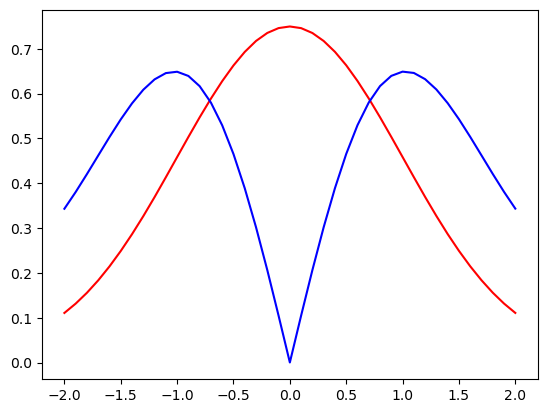

In [120]:
for modes in range(1, 3): 
    A = A_start
    dA = 0.01
    for _ in range(1000):
        epsilon = epsilon_start 
        depsilon = 0.2
        for _ in range(1000):
            x0 = [A, A * np.sqrt(L**2 - epsilon)]
            #y = odeint(shoot3, x0, xspan, args=(epsilon,))
            y = solve_ivp(ivp2, xshoot, x0, t_eval=xspan, args=(epsilon,)).y.T
            if abs((np.sqrt(L**2 - epsilon)) * y[-1,0] + y[-1,1]) < tol: 
                break  
            if (-1) ** (modes + 1) * (np.sqrt(L**2 - epsilon) * y[-1,0] + y[-1,1]) > 0:
                epsilon += depsilon
            else:
                epsilon -= depsilon / 2
                depsilon /= 2   
        epsilon_start = epsilon + depsilon
        Area = np.trapz(y[:, 0] * y[:, 0], xspan)
        if abs(Area - 1) < tol:
            eigenvalues.append(epsilon)
            #norm = np.trapz(y[:, 0] * y[:, 0], xspan)
            #eigenfunctions.append(np.abs(y[:, 0] / np.sqrt(norm)))
            eigenfunctions.append(np.abs(y[:, 0]))
            break
        if Area < 1:
            A += dA
        else:
            A -= dA/2
            dA /= 2  
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) 
    plt.plot(xspan, abs(y[:, 0] / np.sqrt(norm)), col[modes-1]) 
    #plt.plot(xspan, abs(y[:, 0]), col[modes-1]) 

    
A6 = eigenvalues
A5_array = np.array(eigenfunctions)
A5 = A5_array.reshape(2,-1).T

print(A5)
print(A6)
plt.show()

In [117]:
tol = 1e-4
K = 1
L = 2
epsilon_start = 0.1
gamma = - 0.05
A_start = 0.1
xshoot = [-L,L]
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)

eigenvalues = []
eigenfunctions = []
col = ['r', 'b', 'g', 'c', 'm', 'k']

def shoot4(psi, x, epsilon):
    return [psi[1], (gamma * abs(psi[0])**2 + K * x**2 - epsilon) * psi[0]]

def ivp3(x, psi, epsilon):
    return [psi[1], (gamma * abs(psi[0])**2 + K * x**2 - epsilon) * psi[0]]

[[1.09042969e-01 3.40820313e-01]
 [1.29681890e-01 3.78386125e-01]
 [1.53725583e-01 4.18689168e-01]
 [1.81252713e-01 4.60392736e-01]
 [2.12252031e-01 5.01952403e-01]
 [2.46601785e-01 5.41710808e-01]
 [2.84069717e-01 5.77897654e-01]
 [3.24313069e-01 6.08629710e-01]
 [3.66974890e-01 6.32031729e-01]
 [4.11399168e-01 6.46250955e-01]
 [4.56683684e-01 6.49385006e-01]
 [5.01911774e-01 6.39995500e-01]
 [5.46152384e-01 6.17124633e-01]
 [5.88460063e-01 5.80295185e-01]
 [6.27874970e-01 5.29510519e-01]
 [6.63422873e-01 4.65307106e-01]
 [6.94115144e-01 3.88860980e-01]
 [7.18948782e-01 3.01805166e-01]
 [7.37098249e-01 2.06213024e-01]
 [7.48142920e-01 1.04598865e-01]
 [7.51823580e-01 8.20546742e-05]
 [7.48067106e-01 1.04595509e-01]
 [7.36986471e-01 2.06106132e-01]
 [7.18880740e-01 3.01704840e-01]
 [6.94235072e-01 3.88850299e-01]
 [6.63720721e-01 4.65424813e-01]
 [6.28195034e-01 5.29734326e-01]
 [5.88691504e-01 5.80540212e-01]
 [5.46276145e-01 6.17343249e-01]
 [5.01974441e-01 6.40202861e-01]
 [4.567619

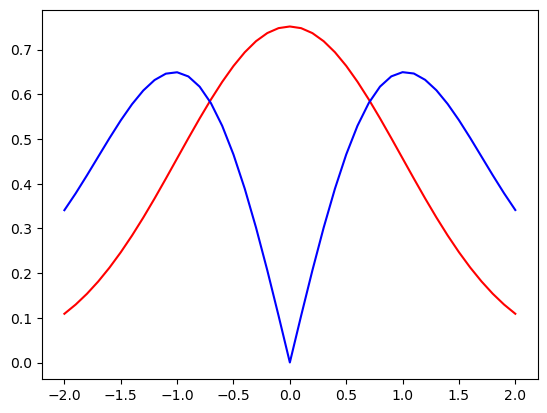

In [118]:
for modes in range(1, 3): 
    A = A_start
    dA = 0.01
    for _ in range(1000):
        epsilon = epsilon_start 
        depsilon = 0.2
        for _ in range(1000):
            x0 = [A, A * np.sqrt(L**2 - epsilon)]
            #y = odeint(shoot4, x0, xspan, args=(epsilon,))
            y = solve_ivp(ivp3, xshoot, x0, t_eval=xspan, args=(epsilon,)).y.T
            if abs((np.sqrt(L**2 - epsilon)) * y[-1,0] + y[-1,1]) < tol: 
                break  
            if (-1) ** (modes + 1) * (np.sqrt(L**2 - epsilon) * y[-1,0] + y[-1,1]) > 0:
                epsilon += depsilon
            else:
                epsilon -= depsilon / 2
                depsilon /= 2   
        epsilon_start = epsilon + depsilon
        Area = np.trapz(y[:, 0] * y[:, 0], xspan)
        if abs(Area - 1) < tol:
            eigenvalues.append(epsilon)
            #norm = np.trapz(y[:, 0] * y[:, 0], xspan)
            #eigenfunctions.append(np.abs(y[:, 0] / np.sqrt(norm)))
            eigenfunctions.append(np.abs(y[:, 0]))
            break
        if Area < 1:
            A += dA
        else:
            A -= dA/2
            dA /= 2  
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) 
    plt.plot(xspan, abs(y[:, 0] / np.sqrt(norm)), col[modes-1]) 
    #plt.plot(xspan, abs(y[:, 0]), col[modes-1]) 

A8 = eigenvalues
A7_array = np.array(eigenfunctions)
A7 = A7_array.reshape(2,-1).T

print(A7)
print(A8)
plt.show()

In [56]:
epsilon = 1
L = 2
xspan = [-L, L]
K = 1
def ivp2(x, psi):
    return [psi[1], (K * x**2 - epsilon) * psi[0]]

In [57]:
def solve_tol(TOL, Method):
    y0 = [1, np.sqrt(K * L**2 - 1)]
    options = {'rtol': TOL, 'atol':TOL}
    sol = solve_ivp(ivp2, xspan, y0, method = Method, **options)
    stepsize = np.mean(np.diff(sol.t))
    return sol, stepsize

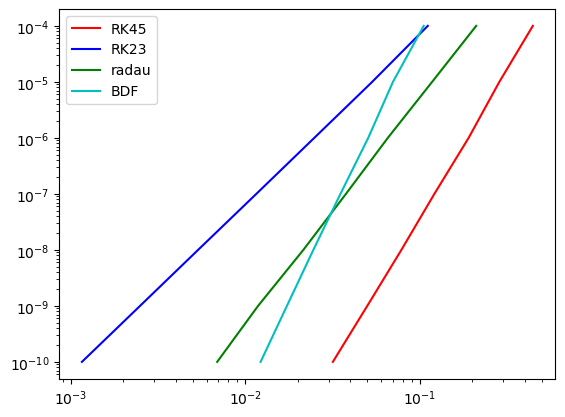

In [58]:
stepsize_RK45=[]
stepsize_RK23=[]
stepsize_Radau=[]
stepsize_BDF=[]
Tol = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
for i in range(0, len(Tol)):
    TOL = Tol[i]
    stepsize_RK45.append(solve_tol(TOL, 'RK45')[1])
    stepsize_RK23.append(solve_tol(TOL, 'RK23')[1])
    stepsize_Radau.append(solve_tol(TOL, 'Radau')[1])
    stepsize_BDF.append(solve_tol(TOL, 'BDF')[1])

plt.loglog(stepsize_RK45, Tol, label = 'RK45', color = col[0])
plt.loglog(stepsize_RK23, Tol, label = 'RK23', color = col[1])
plt.loglog(stepsize_Radau, Tol, label = 'radau', color = col[2])
plt.loglog(stepsize_BDF, Tol, label = 'BDF', color = col[3])
plt.legend()

In [59]:
A9 = []
A9.append(np.polyfit(np.log(stepsize_RK45), np.log(Tol), 1)[0])
A9.append(np.polyfit(np.log(stepsize_RK23), np.log(Tol), 1)[0])
A9.append(np.polyfit(np.log(stepsize_Radau), np.log(Tol), 1)[0])
A9.append(np.polyfit(np.log(stepsize_BDF), np.log(Tol), 1)[0])
print(A9)

[5.244667561772167, 3.019099529504503, 4.038199269261615, 6.457512609631293]


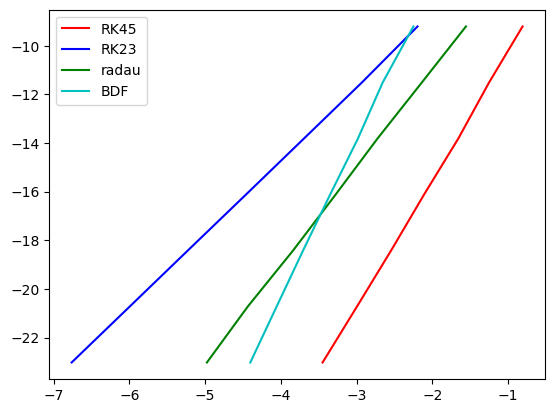

In [60]:
plt.plot(np.log(stepsize_RK45), np.log(Tol), label = 'RK45', color = col[0])
plt.plot(np.log(stepsize_RK23), np.log(Tol), label = 'RK23', color = col[1])
plt.plot(np.log(stepsize_Radau), np.log(Tol), label = 'radau', color = col[2])
plt.plot(np.log(stepsize_BDF), np.log(Tol), label = 'BDF', color = col[3])
plt.legend()

In [61]:
tol = 1e-4
K = 1
L = 4
epsilon_start = 0.1
xshoot = [-L,L]
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)
eigenvalues = []
eigenfunctions = []
col = ['r', 'b', 'g', 'c', 'm', 'k']
def ivp3(x, psi, epsilon):
    return [psi[1], (K * x**2 - epsilon) * psi[0]]

[0.9997357911430298, 2.9990026018582303, 4.998463054653258, 6.997581001278006, 8.996254249569017]


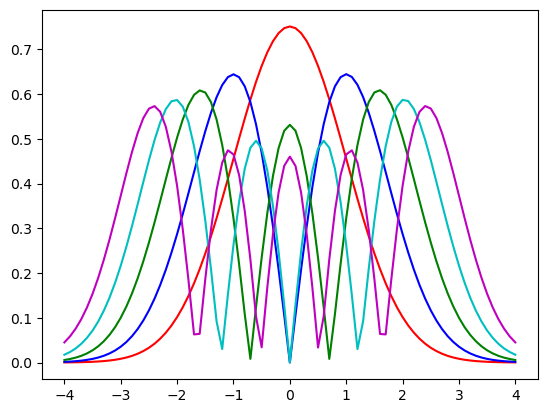

In [62]:
for modes in range(1, 6): 
    epsilon = epsilon_start 
    depsilon = 0.1
    for _ in range(1000):
        x0 = [1, np.sqrt(L**2 - epsilon)]
        y = solve_ivp(ivp3, xshoot, x0, t_eval=xspan, args=(epsilon,)).y.T 
        if abs(np.sqrt(L**2 - epsilon) * y[-1,0] + y[-1,1]) < tol:  
            eigenvalues.append(epsilon)
            norm = np.trapz(y[:, 0] * y[:, 0], xspan)
            eigenfunctions.append(np.abs(y[:, 0] / np.sqrt(norm)))
            break  

        if (-1) ** (modes + 1) * (np.sqrt(L**2 - epsilon)*y[-1, 0] + y[-1,1]) > 0:
            epsilon += depsilon
        else:
            
            epsilon -= depsilon / 2
            depsilon /= 2
            
    epsilon_start = epsilon + 0.1  
    norm = np.trapz(y[:, 0] * y[:, 0], xspan) 
    plt.plot(xspan, abs(y[:, 0] / np.sqrt(norm)), col[modes-1]) 

A1_array = np.array(eigenfunctions)
A1 = A1_array.reshape(5,-1).T
A2 = eigenvalues

print(A2)
plt.show()

In [63]:
L = 4

eigenvalue1 = []
eigenfunction1 = []
eigenvalue2 = []
eigenfunction2 = []
xspan = np.linspace(-L, L, int((L - (-L)) / 0.1) + 1)
def h(x):
    return [1, 2 * x, 4 * x**2 - 2, 8 * x**3 - 12 * x, 16 * x**4 - 48 * x**2 + 12]
def factorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

In [64]:
for j in range(0, 5):
    eigenvalue1.append(100 * abs(A2[j] - (2 * j + 1))/(2 * j + 1))
    eigenvalue2.append(100 * abs(A4[j] - (2 * j + 1))/(2 * j + 1))
    phi = np.exp(- xspan * xspan / 2) * h(xspan)[j] / np.sqrt(factorial(j) * 2**j * np.sqrt(np.pi))
    A1j = A1[:,j]
    A3j = A3[:,j]
    eigenfunction1.append(np.trapz(abs(abs(A1j) - abs(phi))**2, xspan))
    eigenfunction2.append(np.trapz(abs(abs(A3j) - abs(phi))**2, xspan))
    
A10 = eigenfunction1
A11 = eigenvalue1
A12 = eigenfunction2
A13 = eigenvalue2
print(h(xspan)[2] * np.exp(- xspan**2 / 2)/ np.sqrt(2 * (2**2)*(np.pi**0.5)))
print(A10)
print(A11)
print(A12)
print(A13)

[ 0.00552336  0.00778091  0.01083638  0.01491855  0.020301    0.02730308
  0.03628779  0.04765513  0.06182993  0.079243    0.1003047   0.1253706
  0.15469961  0.18840565  0.22640526  0.26836453  0.31364991  0.3612885
  0.40994407  0.45791509  0.50316058  0.54335839  0.57599807  0.59850792
  0.60841206  0.60350974  0.58206541  0.54299478  0.48603031  0.41184872
  0.32214418  0.2196342   0.10798945 -0.00831429 -0.12421744 -0.23435851
 -0.33339792 -0.41635917 -0.47896025 -0.51790742 -0.53112597 -0.51790742
 -0.47896025 -0.41635917 -0.33339792 -0.23435851 -0.12421744 -0.00831429
  0.10798945  0.2196342   0.32214418  0.41184872  0.48603031  0.54299478
  0.58206541  0.60350974  0.60841206  0.59850792  0.57599807  0.54335839
  0.50316058  0.45791509  0.40994407  0.3612885   0.31364991  0.26836453
  0.22640526  0.18840565  0.15469961  0.1253706   0.1003047   0.079243
  0.06182993  0.04765513  0.03628779  0.02730308  0.020301    0.01491855
  0.01083638  0.00778091  0.00552336]
[4.57692814131169